# 신경망 알고리즘

- **구성요소**
- 노드(Node) : 신경망 알고리즘의 기본단위로, 활성함수를 이용해 입력 받은 값을 처리
- 층(Layer) : 여러개의 Node들이 하나의 Filter로써 작동 하게 끔 구성 / Filter를 통해 데이터가 다른 형태로 변환
- 활성함수 (Activation Function) : 각 Node의 출력을 결정하는 함수
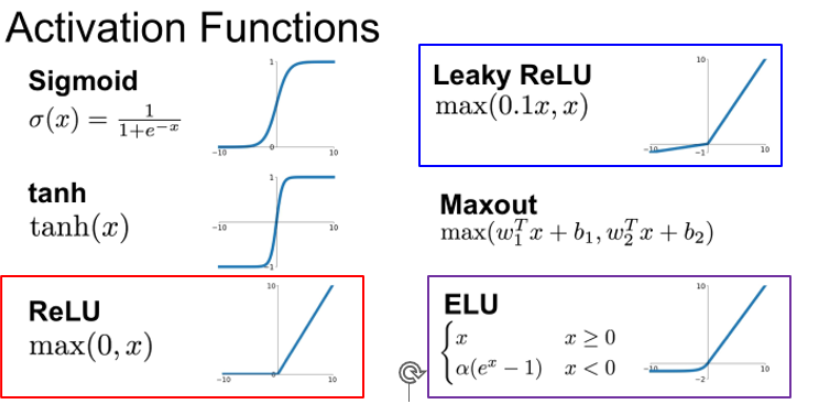

- 손실함수 (loss Function) : 최종 출력에 결과로 나온 예측값과 실제값의 차이를 비교하는 함수
- 옵티마이저 (Optimizer) : 손실함수를 이용해, 앞선 Layer에 있는 Weight를 어떻게 Update할지에 대한 전략
  - 순전파 : X 데이터가 Layer들을 타고 가며 활성 함수에 의해 처리되어 예측값이 나올때 까지의 절차
  - 역전파 : 예측값과 실제값의 비교를 통해, Layer내 Weight를 보정(Update) 해나가는 절차
- Epoch : 순전파와 역전파가 한 번 일어나는 사이클을 몇 회 반복할 것인지 지정하는 횟수
  - Epoch = 20 : 데이터가 입력되고, 예측값이 나온 뒤, 실제갑소가 비교하여 활성함수의 Weight를 업데이틑 하는 절차를 20회 반복
- Batch : 효과적인 학습(시간과 비용을 낮추는)을 위해 데이터셋을 얼만큼 잘라 신경망에 넣을 것인지 결정하는 지표
  - Full Batch Learning : 모든 Row를 신경망 알고리즘에 통과
  - Mini Batch Learning : 데이터 셋 보다 적게 부여하여 통과
  - Bach = 100 : 데이터셋을 100개로 분할하여 샘플을 생성
    - EX) 100,000/100 = 1,000개 데이터를 신경망에 통과

In [5]:
import os
import pandas as pd
import numpy as np
import plotly.express as px
import scipy.stats as stats

In [11]:
df_product = pd.read_csv(r'C:\Users\UserK\Desktop\Ranee\data\ML\26_Data.csv')
print(df_product.shape)
df_product.info()
df_distribution = pd.read_csv(r'C:\Users\UserK\Desktop\Ranee\data\ML\25_Data.csv')
print(df_distribution.shape)
df_distribution.info()
df1 = pd.merge(df_distribution, df_product, on=['상품코드','제품명'], how='left' )

(3611, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3611 entries, 0 to 3610
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품코드    3611 non-null   object
 1   제품명     3611 non-null   object
 2   물품가격    3611 non-null   int64 
 3   대분류     3611 non-null   object
 4   소분류     3611 non-null   object
 5   제조사     2924 non-null   object
dtypes: int64(1), object(5)
memory usage: 169.4+ KB
(731761, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731761 entries, 0 to 731760
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  731761 non-null  int64  
 1   공급ID        731761 non-null  object 
 2   공급일자        731761 non-null  object 
 3   유통Hub       731761 non-null  object 
 4   판매금액        731761 non-null  int64  
 5   수량          731761 non-null  float64
 6   상품코드        731761 non-null  object 
 7   제품명         731761 non-null  object 


In [12]:
df1['공급일자_dt'] = pd.to_datetime(df1['공급일자'])
df1['공급연도'] = df1['공급일자_dt'].dt.year

In [2]:
data_list = os.listdir(r'C:\Users\UserK\Desktop\Ranee\data\네이버데이터랩\네이버데이터랩/') # 특정 폴더 내 파일 명을 확인

In [6]:
df_search = pd.DataFrame()
for i in data_list : 
    print(i.split('_')) # [datalab,남성,10대.xlsx]
    dfn = pd.read_excel(r'C:\Users\UserK\Desktop\Ranee\data\네이버데이터랩\네이버데이터랩/' + i, skiprows=6)                        
    dfn['성별'] = i.split('_')[1] # 남성
    dfn['연령'] = i.split('_')[2][:-5] # 40대.xlsx
    df_search = pd.concat([df_search, dfn])

['datalab', '남성', '10대.xlsx']
['datalab', '남성', '20대.xlsx']


C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains

['datalab', '남성', '30대.xlsx']
['datalab', '남성', '40대.xlsx']
['datalab', '남성', '50대이상.xlsx']
['datalab', '여성', '10대.xlsx']
['datalab', '여성', '20대.xlsx']
['datalab', '여성', '30대.xlsx']
['datalab', '여성', '40대.xlsx']
['datalab', '여성', '50대이상.xlsx']


C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [13]:
df2 = df_search.rename(columns={'바디케어세트' : '검색량'})
df2['검색일자'] = pd.to_datetime(df2['날짜'])

In [14]:
cond1 = (df1['소분류'] == '바디케어세트')
p2 = df1.loc[cond1].pivot_table(index='공급일자_dt' , values='수량', aggfunc='sum').reset_index()

In [15]:
df3 = pd.merge(p2,df2,left_on = '공급일자_dt', right_on ='검색일자' , how='inner')
df3.head()

,공급일자_dt,수량,날짜,검색량,성별,연령,검색일자
0,2021-03-12,238.0,2021-03-12,0.0,남성,10대,2021-03-12
1,2021-03-12,238.0,2021-03-12,0.0,남성,20대,2021-03-12
2,2021-03-12,238.0,2021-03-12,0.0,남성,30대,2021-03-12
3,2021-03-12,238.0,2021-03-12,0.0,남성,40대,2021-03-12
4,2021-03-12,238.0,2021-03-12,0.0,남성,50대이상,2021-03-12


In [17]:
p4 = df3.pivot_table(index='공급일자_dt', columns=['성별','연령'], values=['검색량','수량'], aggfunc='sum')
p4

검색량                                                             \
성별           남성                               여성                             
연령          10대   20대   30대  40대     50대이상   10대   20대       30대       40대   
공급일자_dt                                                                      
2021-03-12  0.0   0.0   0.0  0.0   0.00000   0.0   0.0   0.00000   0.00000   
2021-03-13  0.0   0.0   0.0  0.0   0.00000   0.0   0.0   0.00000   0.00000   
2021-03-14  0.0   0.0   0.0  0.0   0.00000   0.0   0.0   0.00000   0.00000   
2021-03-15  0.0   0.0   0.0  0.0   0.00000   0.0   0.0   0.00000   0.00000   
2021-03-16  0.0   0.0   0.0  0.0   0.00000   0.0   0.0   0.00000   0.00000   
...         ...   ...   ...  ...       ...   ...   ...       ...       ...   
2023-02-04  0.0   0.0   0.0  0.0   0.00000   0.0   0.0   0.00000   0.00000   
2023-02-05  0.0   0.0  40.0  0.0   0.00000   0.0   0.0  33.33333  22.22222   
2023-02-06  0.0  25.0   0.0  0.0   0.00000   0.0  12.5  11.11111  33.33333   
2023-02-07  0.0  50.0   0.0  0.0  33.33333  25.0  50.0  44.44444  88.88888   
2023-02-08  0.0   0.0   0.0  0.0   0.00000   0.0  62.5  55.55555  44.44444   

                         수량                                                   \
성별                       남성                                 여성                 
연령             50대이상    10대    20대    30대    40대  50대이상    10대    20대    30대   
공급일자_dt                                                                        
2021-03-12   0.00000  238.0  238.0  238.0  238.0  238.0  238.0  238.0  238.0   
2021-03-13   0.00000  207.8  207.8  207.8  207.8  207.8  207.8  207.8  207.8   
2021-03-14   0.00000  223.3  223.3  223.3  223.3  223.3  223.3  223.3  223.3   
2021-03-15   0.00000  206.5  206.5  206.5  206.5  206.5  206.5  206.5  206.5   
2021-03-16   0.00000  235.6  235.6  235.6  235.6  235.6  235.6  235.6  235.6   
...              ...    ...    ...    ...    ...    ...    ...    ...    ...   
2023-02-04   0.00000  326.0  326.0  326.0  326.0  326.0  326.0  326.0  326.0   
2023-02-05   0.00000  275.6  275.6  275.6  275.6  275.6  275.6  275.6  275.6   
2023-02-06   0.00000  274.2  274.2  274.2  274.2  274.2  274.2  274.2  274.2   
2023-02-07  28.57142  254.1  254.1  254.1  254.1  254.1  254.1  254.1  254.1   
2023-02-08  14.28571  330.2  330.2  330.2  330.2  330.2  330.2  330.2  330.2   

                          
성별                        
연령            40대  50대이상  
공급일자_dt                   
2021-03-12  238.0  238.0  
2021-03-13  207.8  207.8  
2021-03-14  223.3  223.3  
2021-03-15  206.5  206.5  
2021-03-16  235.6  235.6  
...           ...    ...  
2023-02-04  326.0  326.0  
2023-02-05  275.6  275.6  
2023-02-06  274.2  274.2  
2023-02-07  254.1  254.1  
2023-02-08  330.2  330.2  

[681 rows x 20 columns]

In [18]:
name_col_list = [ x[0] for x in p4.columns]
gender_col_list = [ x[1] for x in p4.columns]
age_col_list = [ x[2] for x in p4.columns]

In [19]:
new_col_name = [x+y+z for x,y,z in zip(name_col_list,gender_col_list,age_col_list)]
p4.columns = new_col_name

In [22]:
search_col = [x for x in p4.columns if '검색량' in x]
X = p4[search_col].reset_index().drop(columns='공급일자_dt')
Y = p4.reset_index()['수량남성10대']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=1234)

In [25]:
from keras import models
from keras.layers import Dense

In [27]:
X.shape

(681, 10)

In [30]:
model = models.Sequential() # 전결합 층 구성 (전결합 -> 데이터가 순차적으로 Layer 통과하는 구조)
model.add( Dense(8, activation='relu', input_shape=(10, )))
# modle.add() : 하나의 layer를 새로 추가
# Dense() : 활성 함수를 가진 일반적인 Node를 구성하는 신경망 구조 함수
# 10의 Column을 8개로 구성된 (relu 활성함수로) 노드에 통과
model.add( Dense(16, activation='relu'))
model.add( Dense(16, activation='relu'))
model.add( Dense(16, activation='relu'))
model.add( Dense(1, activation='linear'))
# 총 4개의 Layer를 통과 하는 신경망이 구성 -> 최종 Output은 Linear 함수에 의해 연속형 자료로 출력

model.compile(optimizer='adam', loss='mean_squared_error' , metrics=['mean_squared_error'])
# 신경망을 통과 한 결과와, 실제 Y값을 '최소 제곱 평균 오차 MSE' 함수로 평가 
# -> adam 최적화로 앞 Layer 내 Node에 있는 활성함수의 Weight를 Update

result = model.fit(X_train, Y_train, epochs=20, validation_split=0.3)
# 학습 데이터와 검증 데이터를 앞서 설꼐한 신경망에 20회 반복하여 통과 시키며 학습을 진행

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 107101.1562 - mean_squared_error: 107101.1562 - val_loss: 93586.0938 - val_mean_squared_error: 93586.1016
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 108722.3516 - mean_squared_error: 108722.3516 - val_loss: 93157.4609 - val_mean_squared_error: 93157.4609
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 111080.2422 - mean_squared_error: 111080.2422 - val_loss: 92468.0312 - val_mean_squared_error: 92468.0312
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 111932.4609 - mean_squared_error: 111932.4609 - val_loss: 91404.8516 - val_mean_squared_error: 91404.8516
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 98598.2734 - mean_squared_error: 98598.2734 - val_loss: 89770.2891 - val_mean_squared_error: 89770.2891
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 107574.1172 - mean_squared_error: 107574.1172 - val_loss: 87276.8594 - val_mean_squared_error: 87276.8594
Epoch 7/20
12/12 

In [31]:
# 신경망 알고리즘을 평가 / Y -> 회귀(연속형) / 평가 : R2 (결정계수)  MSE(평균제곱오차)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [34]:
# 예측값 계산
Y_train_pred = pd.Series(model.predict(X_train).flatten())
Y_test_pred = pd.Series(model.predict(X_test).flatten())
# .flatten() : 신경망 알고지름의 예측 결과가 이중 리스트로 구성되어있기 때문에 이것을 변환
# 변환된 이중 리스트 값을 시리즈 형태로 전환하여, 실제값과 예측값을 비교"

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step


In [35]:
# 평가 ( 결정 계수 0~1 범위 , 1로 가면 갈수록 좋은 모델, 음수 : 이 모델이 데이터에 대해 전혀 예측X)
print('학습 결정 계수 : ' , r2_score(Y_train, Y_train_pred))
print('일반화 결정 계수 : ' , r2_score(Y_test, Y_test_pred))

학습 결정 계수 :  -4.179773253310241
일반화 결정 계수 :  -6.005175166338656


- **신경망 알고리즘에서 어떻게 성능을 향상시키는가?**
  - Layer를 많이 쌓고, Node를 많이 추가하면 성능이 향상되는 경향이 있다.
  - 비정형 데이터를 처리하는 신경망 알고리즘 -> Layer 100~1000

  - **Gradient Vanishing (경사소실)** : Layer층이 깊어질수록 하위 단계(입력에 가까운 쪽) Layer에서 Weight 정보가 소실되는 현상이 발생
  - **Exploding(폭주)** : Weight Update 하려는 Gradient값이 발산하는 현상
  - 특히, 전결합 형태의 신경망 모델의 경우 (데이터가 순차적으로 Layer를 통과하는 경우) 경사 소실, 폭주 현상이 잘 발생하고 취약함

  - **해결방안**

      -  Weight Initializtion(가중치 초기화)
          -  신경망 알고리즘이 양방향으로 학습 될 때 (순전파와 역전파가 반복)으로 Weight Upadate하려는 정보가 잘 통하게 하기 위하여, 특정 Layer에서 학습 시간이 오래 걸리지 않게, Weight 일부를 초기화
          1. RBM (Resticted Boltzmann Machine, 제한된 볼츠만 머신 초기화) 초기화
             - Layer와 Layer간의 입력값과 출력값의 분산이 동일해 질 때 까지 특정 Node Weight 초기화
          2. Xavier (글로럿 초기화, 세이버 초기화)
             - 가중치의 분포를 이용하여 각 Layer 사이의 Weight 값이 Update 될 때, 무작위 특정 Weight를 초기화 / 분호추정을 통한 초기화
          3. He Normal
             - ReLU(특정 임계값이상일 때, X에(입력) 따라 비례하는 Y(출력)을 계산하는 활성함수) 활성 함수를 이용해, 출력값의 분산을 반으로 줄여서, 가중치의 분산이 2배로 늘어나게 변경
             - He Normal 초기화를 가장 많이 활용한다.

      - Batch Normaliztion (배치의 정규화)
          - 각 Layer에서 활성함수를 통과하기 전에, 연산을 (입력 데이터 원점을 맞춰 정규화) 추가하여 새로운 Weight값의 Sclae를 조정

In [36]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.initializers import HeNormal

In [40]:
model1 = models.Sequential()
model1.add( Dense(16, activation='relu', input_shape=(10,) ))
model1.add(BatchNormalization())
model1.add( Dense(16, activation='relu', kernel_initializer=HeNormal))
model1.add( Dense(16, activation='relu', kernel_initializer=HeNormal))
model1.add(BatchNormalization())
model1.add( Dense(16, activation='relu', kernel_initializer=HeNormal))
model1.add( Dense(16, activation='relu', kernel_initializer=HeNormal))
model1.add( Dense(1, activation='linear'))
model1.compile(optimizer='adam', loss='mean_squared_error' , metrics=['mean_squared_error'])
# 신경망을 통과 한 결과와, 실제 Y값을 '최소 제곱 평균 오차 MSE' 함수로 평가 
# -> adam 최적화로 앞 Layer 내 Node에 있는 활성함수의 Weight를 Update

result = model1.fit(X_train, Y_train, epochs=20, validation_split=0.3)

Epoch 1/20


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 104154.5625 - mean_squared_error: 104154.5625 - val_loss: 93016.1641 - val_mean_squared_error: 93016.1641
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 112557.4453 - mean_squared_error: 112557.4453 - val_loss: 92832.9453 - val_mean_squared_error: 92832.9453
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 103672.0078 - mean_squared_error: 103672.0078 - val_loss: 92495.7188 - val_mean_squared_error: 92495.7188
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 105259.0703 - mean_squared_error: 105259.0703 - val_loss: 92021.1641 - val_mean_squared_error: 92021.1641
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 111934.8203 - mean_squared_error: 111934.8203 - val_loss: 91322.5391 - val_mean_squared_error: 91322.5391
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 105469.7500 - mean_squared_error: 105469.7500 - val_loss: 90398.9141 - val_mean_squared_error: 90398.9141
Epoch 7/20
12/12 ━━━━━━━━━